In [2]:
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [6]:
df = df[df['species'] != "setosa"]

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [8]:
df["species"] = df["species"].map({'versicolor': 0, 'virginica': 1})

,species
50,0
51,0
52,0
53,0
54,0
...,...
145,1
146,1
147,1
148,1


In [9]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

In [14]:
from sklearn.model_selection import GridSearchCV

parameter = {'penalty': ['l1', 'l2', 'elasticnet'], 'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50], 'max_iter': [100, 200, 300]}

In [16]:
classifier_regressor = GridSearchCV(classifier, param_grid= parameter, scoring='accuracy', cv=5)

In [17]:
classifier_regressor.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
330 fits failed out of a total of 495.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
165 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_sol

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [18]:
print(classifier_regressor.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [19]:
print(classifier_regressor.best_score_)

0.9733333333333334


In [20]:
y_pred = classifier_regressor.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, classification_report

In [23]:
score = accuracy_score(y_test, y_pred)
print(score)

0.92


In [24]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

  versicolor       0.93      0.93      0.93        14
   virginica       0.91      0.91      0.91        11

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25



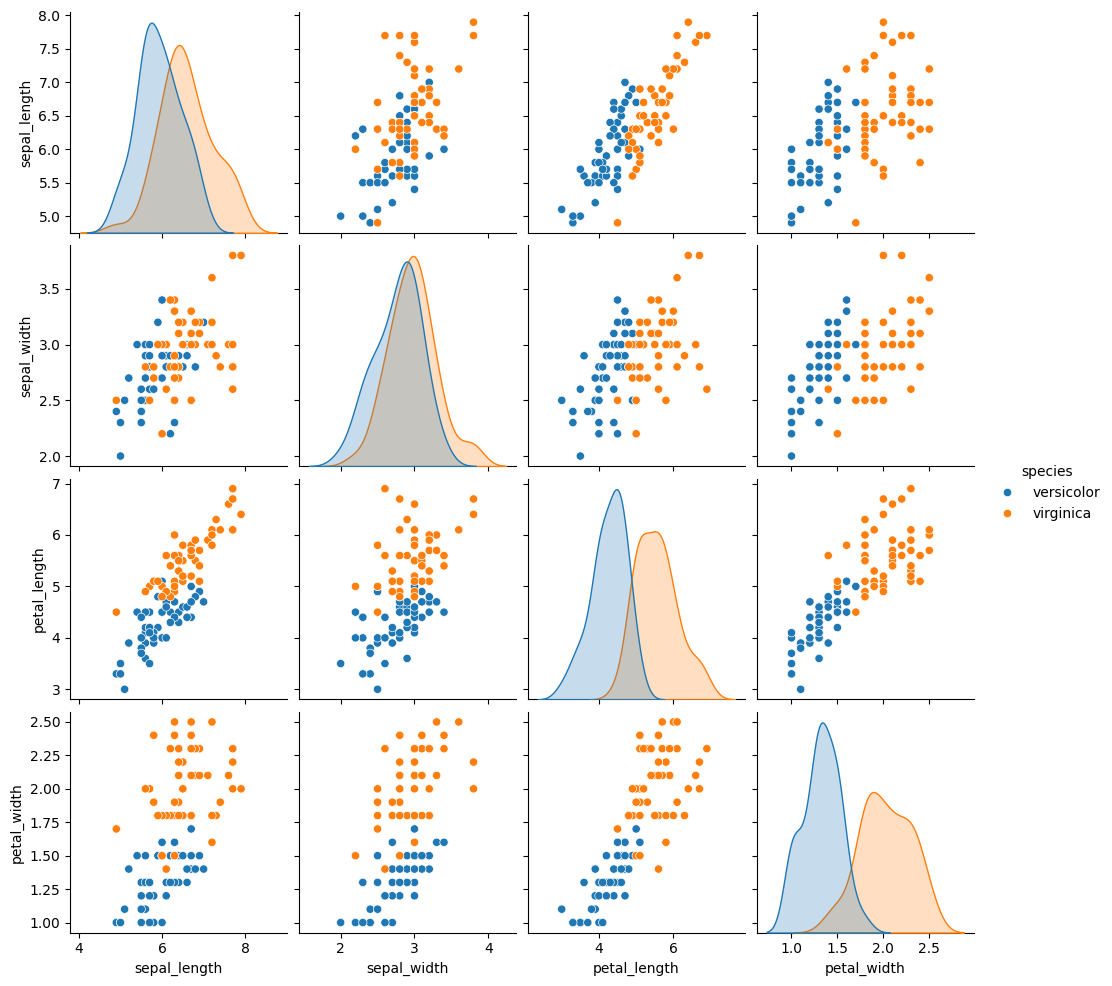

In [25]:
## EDA

sns.pairplot(df, hue='species')

In [27]:
df.corr(numeric_only=True)


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.553855,0.828479,0.593709
sepal_width,0.553855,1.000000,0.519802,0.566203
petal_length,0.828479,0.519802,1.000000,0.823348
petal_width,0.593709,0.566203,0.823348,1.000000
